 ## HW3 - Satellite image segmentation & classification 

Include your code in the relevant cells below. Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in place or plots placed prominently, as appropriate.

In [2]:
import numpy as np
import pandas as pd 
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import random

data = pd.read_json('C:\\Users\\User\\OneDrive\\Desktop\\Spring 2021\\MUSA\\planesnet.json')                                                   

### S1:

- Load the Planes in Satellite Imagery dataset: https://www.kaggle.com/rhammell/planesnet.


Q1.1: Visualize a few of the images for different labels.

Q1.2: What is the total number of images in this dataset:   ___

Q1.3: What is the number of labels in this dataset:   ___

Q1.4: What is the size of each image in this dataset:   ___

Images of Planes


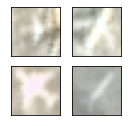

Images Not of Planes


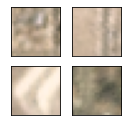

In [7]:
print('Images of Planes')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    img = np.array(data['data'][e[i]]) / 255.
    img = img.reshape(( 3, 400)).T.reshape(1, 20,20,3)
    plt.imshow(img[0])   
plt.show()

g = np.where(data['labels'] == 0)[0]
plt.figure(figsize=(2,2))

print('Images Not of Planes')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    img = np.array(data['data'][g[i]]) / 255.
    img = img.reshape(( 3, 400)).T.reshape(1, 20,20,3)
    plt.imshow(img[0])   
plt.show()

In [8]:
print(f"Total number of images: {data.shape[0]}")
print(f"Number of labels: {len(np.unique(np.array(data['labels'])))}")
print(img.shape)
print(f"The size of each image is 20 x 20 pixels")

Total number of images: 32000
Number of labels: 2
(1, 20, 20, 3)
The size of each image is 20 x 20 pixels


### S2:

- Create data matrices X and y as follows:
  - Extract the color channels from each image and flatten them to a feature matrix X (*Hint: use the included JSON file to do this easily*).
  - Create the labels y (with binary labels 0 and 1) for each image.
- Using X and y, create a split dataset with 60% training and 40% testing data with similar distributions for the two classes.

Q2.1: What is the size of X (before splitting):   ___

Q2.2: What is the size of y (before splitting):   ___

In [40]:
#Q2.1 &2.2
x = []
for d in data['data']:
    d = np.array(d)
    x.append(d.reshape(( 3, 400)).T.reshape( (20,20,3) ))
x = np.array(x)
x = x.flatten().reshape(32000,1200)
y = np.array(data['labels'])
print(x.shape)
print(y.shape)
print ('x and y both have 32,000 samples') #Note: x matrix is 32000 X 1200 while y matrix is 32000 X 1

(32000, 1200)
(32000,)
x and y both have 32,000 samples


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=17)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19200, 1200) (12800, 1200) (19200,) (12800,)


### S3:

- Train a SVM classifier using the Sigmoid kernel (with default values for other parameters) on the training data and use it to predict labels of the testing data.

Q3.1: Draw the ROC for the classification 

Q3.2: What is the training accuracy: ___

Q3.3: What is the testing accuracy: ___

Q3.4: What is the AUC: ___

In [37]:
svmC = svm.SVC(kernel='sigmoid', probability=True)
svmC.fit(x_train, y_train)
y_pr_tr=svmC.predict(x_train)
y_pred=svmC.predict(x_test)

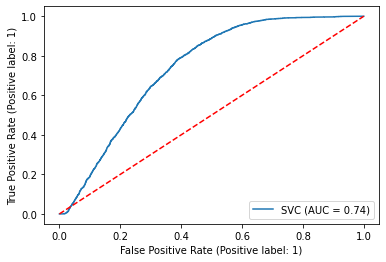

In [39]:
metrics.plot_roc_curve(svmC, x_test, y_test)
plt.plot([0,1],[0,1],'r--')

In [38]:
print ('sigmoid training accuracy =', accuracy_score(y_train, y_pr_tr))
print ('sigmoid testing accuracy =', accuracy_score(y_test, y_pred))

y_probas=svmC.predict_proba(x_test)
probs = y_probas[:, 1]
print ('sigmoid ROC AUC =', roc_auc_score(y_test, probs))

sigmoid training accuracy = 0.75234375
sigmoid testing accuracy = 0.746484375
sigmoid ROC AUC = 0.7372750735946862


### S4:
- Train a new SVM classifier using the RBF kernel (leaving other parameters as their default values), and use it to predict labels of the testing data.

Q4.1: What is the training accuracy: ___

Q4.2: What is the testing accuracy: ___

Q4.3: What is the AUC: ___

Q4.4: Using the metrics of accuracy and AUC, which of your models is better? Is there anything else to consider?

In [35]:
svmC = svm.SVC(kernel='rbf', probability=True)
svmC.fit(x_train, y_train)
y_pr_tr=svmC.predict(x_train)
y_pred=svmC.predict(x_test)

print ('rbf training accuracy =', accuracy_score(y_train, y_pr_tr))
print ('rbf testing accuracy =', accuracy_score(y_test, y_pred))

y_probas=svmC.predict_proba(x_test)
probs = y_probas[:, 1]
print ('rbf ROC AUC =', roc_auc_score(y_test, probs))

rbf training accuracy = 0.9640625
rbf testing accuracy = 0.95515625
rbf ROC AUC = 0.9870044563991296


****Q4.4 Answer:

Based on accuracy and AUC, the rbf model is clearly the better choice. It has a better accuracy and even much better ROC AUC (how the model ranks a point from the plane class over the non-plane class) which gives even a broader view of the perormance of the models. 
One thing to consider is the fact that both accuracy and ROC AUC do not really account for imbalances in the data sampling. In this case, only 25% of our data set are planes. I could get a 75% accuracy (like I did for the sigmoid model) just by classifying all the images as not having planes, or I could get a speciously high value for AUC though it could be high due to large FP, rather than the large TP (True positive).

### S5:
- You will now try to find the best value for the regularization parameter $C$ from among the values [0.1, 1, 10].
- Create a random sample of 10% of the training data. Make sure it is representative of the original data (similar distributions for both classes).
- Train a SVM classifier with Sigmoid kernel with different values for $C$ using leave-10%-out cross-validation.
- Train a SVM classifier with RBF kernel with different values for $C$ using leave-10%-out cross-validation.
- **(Optional)** Try running this analysis using the entire training set.

Q5.1: What is the best choice of $C$ for the linear kernel: ___

Q5.2: What is the best choice of $C$ for the RBF kernel: ___

In [20]:
random.seed(17)
f = random.sample(range(0, 19199), 1920)
x_10 = x_train[f,:]
y_10 = y_train[f]
(y_10 == 1).sum()
print('There are 458 planes in the sample which is about 23.8% and close to the original proportion of 25%')

There are 458 planes in the sample which is about 23.8% and close to the original proportion of 25%


In [21]:
def SVM(kern, reg):
    svmC = svm.SVC(kernel=kern, C=reg, probability=True)
    svmC.fit(x_10, y_10)
    yhat = cross_val_predict(svmC, x_10, y_10, cv=10)
    acc = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='accuracy')
    auc = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='roc_auc')
    f1 = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='f1')
    print(f"C = {reg} - accuracy: {np.mean(acc)}")
    print(f"C = {reg} - ROC AUC: {np.mean(auc)}")
    print(f"C = {reg} - f1 score: {np.mean(f1)}")

In [25]:
print(f"Sigimoid Kernel:")
SVM("sigmoid", 0.1)
SVM("sigmoid", 1)
SVM("sigmoid", 10)

sigmoid,0.1 - accuracy: 0.7588541666666666
sigmoid,0.1 - ROC AUC: 0.673676629675098
sigmoid,0.1 - f1 score: 0.0
sigmoid,1 - accuracy: 0.7520833333333333
sigmoid,1 - ROC AUC: 0.673676629675098
sigmoid,1 - f1 score: 0.0
sigmoid,10 - accuracy: 0.7380208333333333
sigmoid,10 - ROC AUC: 0.673676629675098
sigmoid,10 - f1 score: 0.0021739130434782613


In [26]:
print(f"RBF Kernel:")
SVM("rbf", 0.1)
SVM("rbf", 1)
SVM("rbf", 10)

rbf,0.1 - accuracy: 0.8307291666666667
rbf,0.1 - ROC AUC: 0.939959704085459
rbf,0.1 - f1 score: 0.4808200949514557
rbf,1 - accuracy: 0.9260416666666667
rbf,1 - ROC AUC: 0.9626579254559344
rbf,1 - f1 score: 0.8383502750763367
rbf,10 - accuracy: 0.9458333333333334
rbf,10 - ROC AUC: 0.9723962068448582
rbf,10 - f1 score: 0.8851220864498452


Q5 Answers: 

For the "best choice" I'll be determining this based on f-1 score since I have an imbalanced dataset (much more samples in the non-plane class than the plane class) and f-1 takes into consideration precision and recall as well as the distribution of my data. 
For the sigmoid kernel, the best regularization parameter is 10. The other parameters have a recall or precision of 0 since their f-1 is 0. 
For the RBF kernel, the best regularization parameter is also 10. This model with this parameter has the highest scores across the board. 

### S6: 
- You will now do a parameter gridsearch to find the best pair for two parameters, using the same random 10% sample of the training data from S5.
- Train a SVM classifier using the polynomial kernel with degrees [2, 3, 5].
- For each value of the degree, find the best values for $C$ from among the values [0.1, 1, 10] using leave-10%-out cross-validation.
- **(Optional)** Try running this analysis using the entire training set.

Q6.1: What is the best value for the degree of the polynomial: ___   (*Hint: this depends on the values of $C$*)

Q6.2: What is the best value of $C$ for each degree of polynomial: ___

In [28]:
def SVM_pol(deg, reg):
    svmC = svm.SVC(kernel='poly', degree=deg, C=reg, probability=True)
    svmC.fit(x_10, y_10)
    yhat = cross_val_predict(svmC, x_10, y_10, cv=10)
    acc = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='accuracy')
    auc = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='roc_auc')
    f1 = cross_val_score(svmC , x_10, y_10, cv = 10, scoring='f1')
    print(f"C = {reg} - accuracy: {np.mean(acc)}")
    print(f"C = {reg} - ROC AUC: {np.mean(auc)}")
    print(f"C = {reg} - f1 score: {np.mean(f1)}")

In [32]:
print(f"Polynomial Kernel with 2 degrees:")
SVM_pol(2,0.1)
print("")
SVM_pol(2,1)
print("")
SVM_pol(2,10)

Polynomial Kernel with 2 degrees:
C= 0.1 - accuracy: 0.8994791666666666
C= 0.1 - ROC AUC: 0.9462686662912138
C= 0.1 - f1 score: 0.7861088502818051

C= 1 - accuracy: 0.9140625
C= 1 - ROC AUC: 0.9559839883276453
C= 1 - f1 score: 0.8146789251954096

C= 10 - accuracy: 0.9114583333333334
C= 10 - ROC AUC: 0.9502332220029828
C= 10 - f1 score: 0.8182507619810273


In [30]:
print("Polynomial Kernel with 3 degrees:")
SVM_pol(3,0.1)
print("")
SVM_pol(3,1)
print("")
SVM_pol(3,10)

Polynomial Kernel with 3 degrees:
C= 0.1 - accuracy: 0.9234374999999998
C= 0.1 - ROC AUC: 0.9583062322937248
C= 0.1 - f1 score: 0.8382474096648826

C= 1 - accuracy: 0.9119791666666668
C= 1 - ROC AUC: 0.9519647600950247
C= 1 - f1 score: 0.8179969264148232

C= 10 - accuracy: 0.9098958333333333
C= 10 - ROC AUC: 0.9494080291106582
C= 10 - f1 score: 0.8170433267228014


In [31]:
print(f"Polynomial Kernel with 5 degrees:")
SVM_pol(5,0.1)
print("")
SVM_pol(5,1)
print("")
SVM_pol(5,10)

Polynomial Kernel with 5 degrees:
C= 0.1 - accuracy: 0.9171875
C= 0.1 - ROC AUC: 0.9378259091340857
C= 0.1 - f1 score: 0.8291117098637242

C= 1 - accuracy: 0.9145833333333334
C= 1 - ROC AUC: 0.9361637060356536
C= 1 - f1 score: 0.8236069212610253

C= 10 - accuracy: 0.9145833333333334
C= 10 - ROC AUC: 0.9361637060356536
C= 10 - f1 score: 0.8236069212610253


Technically, the degree with the highest f1 score (0.838) was 3 when it was combined with a regularization parameter of 0.1.
For degree 2, the best regularization was 10. For degrees 3 and 5, it was 0.1. Again, I'm basing this off f1 score first and then off AUC. 

### S7: 
Q7.1: From among all the models you have trained, which model would you use in practice, and why? Make sure to provide any metrics you used for your justification.

I would choose the model with the RBF kernel and a regularization parameter of 10.

My reasoning: Right off the bat, I eliminated the sigmoid model because its f1 scores were really bad (they were 0 or very near 0) compared to the other models. Other than the rbf model with the 0.1 regularization parameter, the other rbf models overall had higher f1 scores and AUC's than all the polynomial kernel models, so I decided to narrow it down to my last two rbf choices. Using cross validation and 10% of the training data set, the accuracy, auc and f1 score of the model with a regularization parameter of 10 did better than that of 1. However, using the full training set, the rbf model which had a default regularization parameter of 1.0 had a higher accuracy and AUC than the model with the regularization parameter of 10 (this was the cross validated one). In the end, I decided to go with the regulraization parameter of 10 because I decided to put more weight on comparing the 2 cross-validated models since on a non-cross-validated one your results could be different depending on the split of the data. Also, even with only using 10% of the training set, the accuracy and AUC scores of the model where C=10 were fairly close to that of the model with the regularization parameter of 1 that used the full training data.